In [27]:
# Importing the pandas module
import pandas as pd

# Importing the visualization module
import matplotlib.pyplot as plt
import seaborn as sns

# Reading in the data
df = pd.read_csv('data/chocolate_bars.csv')

# Take a look at the first datapoints
df.head()

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00


In [28]:
# Check missing values
df.isna().sum()

id                   0
manufacturer         0
company_location     0
year_reviewed        0
bean_origin          0
bar_name             0
cocoa_percent        0
num_ingredients     87
ingredients         87
review               0
rating               0
dtype: int64

## The average rating by country of origin
We can use the groupby method on the dataframe and select the column that we want to compute the mean. We get the results that Tobago has the highest average rating value with a value of 3.625, and Puerto Rico has the lowest average rating value with a value of 2.714286.

In [29]:
df.groupby('bean_origin')['rating'].mean().sort_values(ascending = False)

bean_origin
Tobago                   3.625000
China                    3.500000
Sao Tome & Principe      3.500000
Solomon Islands          3.450000
Congo                    3.318182
                           ...   
Sierra Leone             2.750000
St.Vincent-Grenadines    2.750000
Principe                 2.750000
Martinique               2.750000
Puerto Rico              2.714286
Name: rating, Length: 62, dtype: float64

## The number of bars reviewed for each country
We can use the value_counts method on the dataframe. We get the results that Venezuela has the highest value with a value of 253.

In [30]:
df['bean_origin'].value_counts()

Venezuela             253
Peru                  244
Dominican Republic    226
Ecuador               219
Madagascar            177
                     ... 
Martinique              1
DR Congo                1
Burma                   1
Sulawesi                1
Sumatra                 1
Name: bean_origin, Length: 62, dtype: int64

## Visualize the average rating by country of origin

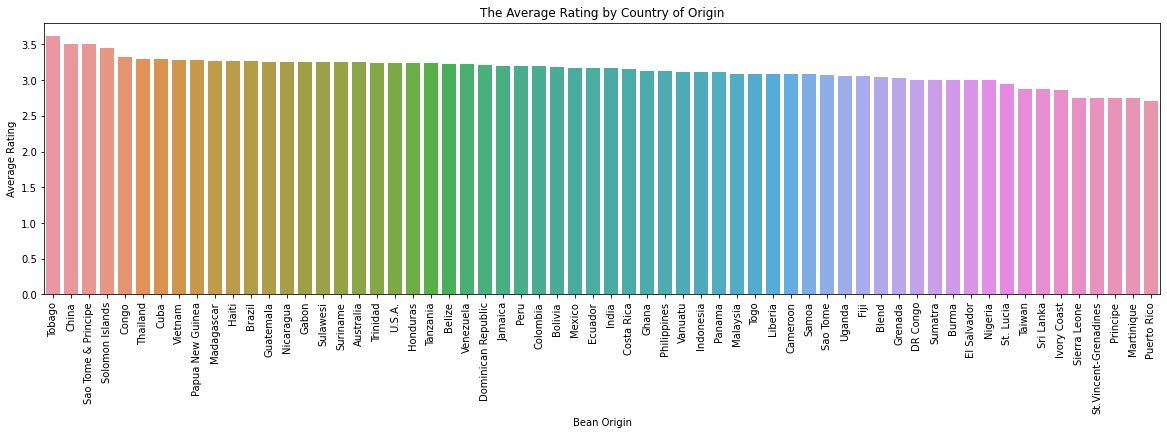

In [31]:
plt.figure(figsize=(20, 5))
sns.barplot(x = 'bean_origin', y = 'rating', data = df, ci = False, order = df.groupby('bean_origin')['rating'].mean().sort_values(ascending = False).index)
plt.title('The Average Rating by Country of Origin')
plt.ylabel('Average Rating')
plt.xlabel('Bean Origin')
plt.xticks(rotation = 90)
plt.show()

## Visualize the number of bars reviewed for each country

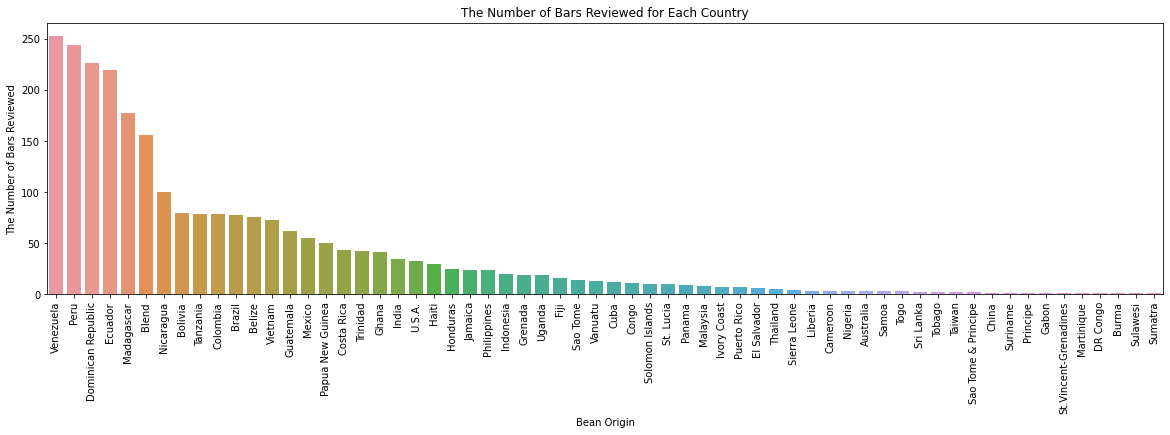

In [32]:
plt.figure(figsize=(20, 5))
sns.countplot(x = 'bean_origin', data = df, order = df['bean_origin'].value_counts().index)
plt.xticks(rotation = 90)
plt.title('The Number of Bars Reviewed for Each Country')
plt.ylabel('The Number of Bars Reviewed')
plt.xlabel('Bean Origin')
plt.show()

## Is the cacao bean's origin an indicator of quality?
Since the number of bars reviewed for each country is not balanced, We will use only a few countries for observation. From the plot point below we can see that bean origin affects the rating so it can be said that bean origin is an indicator of quality.

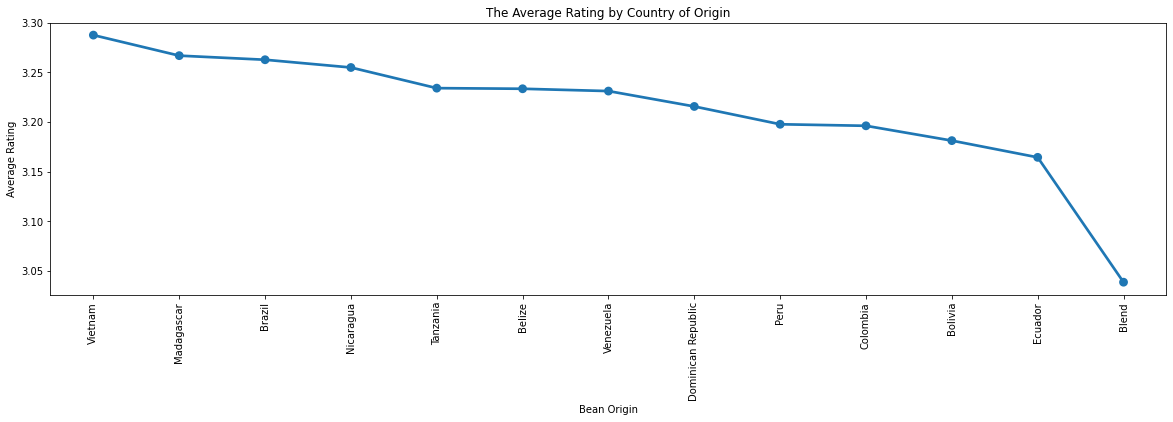

In [33]:
plt.figure(figsize=(20, 5))
sns.pointplot(x = 'bean_origin', y = 'rating', data = df, ci = False, order = df[df['bean_origin'].isin(df['bean_origin'].value_counts()['Venezuela':'Vietnam'].index)].groupby('bean_origin')['rating'].mean().sort_values(ascending = False).index)
plt.title('The Average Rating by Country of Origin')
plt.ylabel('Average Rating')
plt.xlabel('Bean Origin')
plt.xticks(rotation = 90)
plt.show()

## Relationship between cocoa content and rating
from the lineplot below we can see that the average cocoa percent decreases as the rating increases and the average content with a rating above 3.5 is 70.94781553398059 percent.

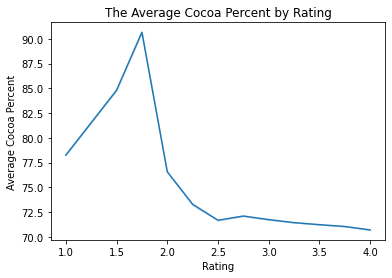

In [34]:
sns.lineplot(x = 'rating', y = 'cocoa_percent', data = df, ci = False)
plt.title('The Average Cocoa Percent by Rating')
plt.ylabel('Average Cocoa Percent')
plt.xlabel('Rating')
plt.show()

In [35]:
df[df['rating'] > 3.5]['cocoa_percent'].mean()

70.94781553398059

Because our data has missing values, we will divide two observations. Data with missing values and data with no missing values

## With Missing Values
From the point plot, we can conclude that bars without lecithin have a higher average rating than bars with lecithin

In [36]:
df['With Lecithin'] = df['ingredients'].str.contains('L', na = False)
df['With Lecithin'] = df['With Lecithin'].map({False: 'Without Lecithin', True:'With Lecithin'})

In [37]:
df.groupby('With Lecithin')['rating'].mean()

With Lecithin
With Lecithin       3.150609
Without Lecithin    3.207413
Name: rating, dtype: float64

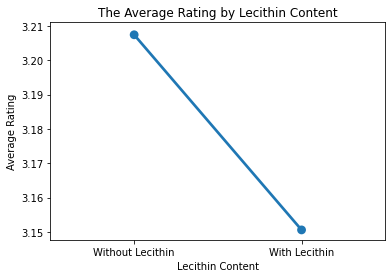

In [38]:
sns.pointplot(x = 'With Lecithin', y = 'rating', data = df, ci = False)
plt.title('The Average Rating by Lecithin Content')
plt.ylabel('Average Rating')
plt.xlabel('Lecithin Content')
plt.show()

## Without Missing Values
We will drop missing value. From the point plot, we can conclude that bars without lecithin have a higher average rating than bars with lecithin

In [39]:
df_nona = df.dropna()

In [40]:
df_nona['With Lecithin'] = df_nona['ingredients'].str.contains('L', na = False)
df_nona['With Lecithin'] = df_nona['With Lecithin'].map({False: 'Without Lecithin', True:'With Lecithin'})

In [41]:
df_nona.groupby('With Lecithin')['rating'].mean()

With Lecithin
With Lecithin       3.150609
Without Lecithin    3.225128
Name: rating, dtype: float64

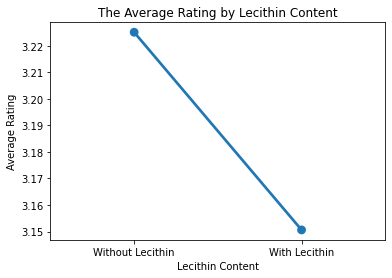

In [42]:
sns.pointplot(x = 'With Lecithin', y = 'rating', data = df_nona, ci = False)
plt.title('The Average Rating by Lecithin Content')
plt.ylabel('Average Rating')
plt.xlabel('Lecithin Content')
plt.show()

## Summarize
1. Tobago has the highest average rating value with a value of 3.625, and Puerto Rico has the lowest average rating value with a value of 2.714286.
2. Venezuela has the highest number of bars reviewed with a value of 253.
3. Bean origin affects the rating so it can be said that bean origin is an indicator of quality.
4. The average cocoa percent decreases as the rating increases and the average content with a rating above 3.5 is 70.94781553398059 percent.
5. Bars without lecithin have a higher average rating than bars with lecithin